In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')

players = pd.read_csv('https://storage.googleapis.com/big-data-bowl/players.csv')
plays = pd.read_csv('https://storage.googleapis.com/big-data-bowl/plays.csv')

week1 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week1.csv')
week2 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week2.csv')
week3 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week3.csv')
week4 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week4.csv')
week5 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week5.csv')
week6 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week6.csv')
week7 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week7.csv')
week8 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [3]:
# Slice tracking data for football position
football_tracking = tracking[tracking['team'] == 'football']

In [4]:
# Find possession for player tracking data
player_tracking = tracking.loc[tracking['team'] != 'football']
player_tracking = player_tracking.merge(plays[['gameId', 'playId', 'possessionTeam']])
player_tracking['possession'] = player_tracking['team'] == player_tracking['possessionTeam']
player_tracking['possession'] = player_tracking['possession'].apply(lambda x: int(x))

In [5]:
# Merge football position by frame
positions = player_tracking[['gameId', 'playId', 'frameId', 'nflId', 'possession', 'o', 'x', 'y']].merge(
    football_tracking[['gameId', 'playId', 'frameId', 'x', 'y']],
    on=['gameId', 'playId', 'frameId'],
    suffixes=('', '_fb')
)

In [6]:
# Normalize player coordinates
positions['x_rel'] = positions['x_fb'] - positions['x']
positions['y_rel'] = positions['y_fb'] - positions['y']

In [7]:
# Get QB tracking data
positions = positions.merge(players[['nflId', 'officialPosition']], how='inner')
qb_positions = positions[positions['officialPosition'] == 'QB']

In [8]:
# Set football possession threshold
fb_possession_threshold = 1

In [9]:
# Define function to get random gameId and playId
def get_random_play():
    slice = red_zone_qb_proximity.groupby(['gameId', 'playId']).size().reset_index().sample(n=1)
    return slice.iloc[0,0], slice.iloc[0,1]

C:\Users\lself\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


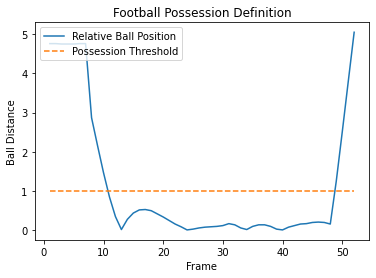

In [13]:
# Plot results for random play

# Get random play
gameId, playId = get_random_play()

# Slice for QB possession frames
qb_positions_test = qb_positions[
    (qb_positions['gameId'] == gameId) & \
    (qb_positions['playId'] == playId)
]

# Plot relative ball X distance
qb_positions_test['x_rel'] = qb_positions_test['x_rel'].apply(lambda x: abs(x))

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot()

plt.plot(
    qb_positions_test['frameId'],
    qb_positions_test['x_rel']
)

plt.plot(
    qb_positions_test['frameId'],
    [fb_possession_threshold for x in qb_positions_test['frameId']],
    '--'
)

plt.legend(["Relative Ball Position", "Possession Threshold"], loc ="upper left")
plt.xlabel("Frame")
plt.ylabel("Ball Distance")
    
plt.title('Football Possession Definition')

plt.show()